### Data Cleaning and Preperation
Author: Anthony Zalev
Date: 4/16/2022
Goal: Gather, clean and compile datasets for our stats 535 projects

# Datasets:

1. COVID-19 Vaccinations in the United States,County. Originally downloaded as a csv on 4/16/2022 from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh/data
Lots of covid health data - cases and deaths.
Start date 12/13/2020
First covid vaccine shot given on 12/11 according to the fda

https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh look here for details on the 66 columns.

2. New York Times Covid 19 tracking data

date,county,state,fips,cases,deaths
starts on 2020/1/21
Also collected on 4/16/2022

https://github.com/nytimes/covid-19-data

In [18]:
#Imports
import sqlite3 as sq
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import pdb

In [13]:
#create our sqllite database
conn = sq.connect('datasets/{}.sqlite'.format("master")) #create file

In [4]:
#import nyt csv and check it out
nyt_covid = pd.read_csv('datasets/us-counties.csv')
nyt_covid.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [7]:
#move nyt_covid to database
nyt_covid.to_sql(name="nyt_covid", con = conn, if_exists='replace', index = False)

In [28]:
cdc_vaccine_db = pd.read_csv('datasets/COVID-19_Vaccinations_in_the_United_States_County.csv', low_memory=False)

In [20]:
#move cdc_vaccine_db to database
cdc_vaccine_db.to_sql(name="cdc_vaccine", con = conn, if_exists='replace', index = False)

In [29]:
#make backup incase I mess up and need to nuke it.
cdc_vaccine_db.to_sql(name="cdc_vaccine_backup", con = conn, if_exists='replace', index = False)
nyt_covid.to_sql(name="nyt_covid_backup", con = conn, if_exists='replace', index = False)

In [ ]:
nyt_covid = pd.read_sql_table()

In [30]:
del cdc_vaccine_db
del nyt_covid

Begin cleanup

In [6]:
c = conn.cursor()

In [36]:
#c.execute("SELECT * FROM nyt_covid")
nyt_records = pd.read_sql_query("SELECT * FROM nyt_covid LIMIT 10", conn)
print(nyt_records)
cdc_vaccine_records = pd.read_sql_query("SELECT * FROM cdc_vaccine LIMIT 10", conn)
print(cdc_vaccine_records)

         date       county       state     fips  cases  deaths
0  2020-01-21    Snohomish  Washington  53061.0      1     0.0
1  2020-01-22    Snohomish  Washington  53061.0      1     0.0
2  2020-01-23    Snohomish  Washington  53061.0      1     0.0
3  2020-01-24         Cook    Illinois  17031.0      1     0.0
4  2020-01-24    Snohomish  Washington  53061.0      1     0.0
5  2020-01-25       Orange  California   6059.0      1     0.0
6  2020-01-25         Cook    Illinois  17031.0      1     0.0
7  2020-01-25    Snohomish  Washington  53061.0      1     0.0
8  2020-01-26     Maricopa     Arizona   4013.0      1     0.0
9  2020-01-26  Los Angeles  California   6037.0      1     0.0
         Date   FIPS  MMWR_week     Recip_County Recip_State  \
0  2022-04-16  19053         15   Decatur County          IA   
1  2022-04-16  17061         15    Greene County          IL   
2  2022-04-16  17069         15    Hardin County          IL   
3  2022-04-16  17113         15    McLean County   

The following statements were executed in a sqlliteconsole

In [33]:
#change format of cdc vaccine from mm/dd/yyyy to yyyy/mm/dd
#UPDATE cdc_vaccine SET cdc_vaccine.Date = substr(main.cdc_vaccine.Date, 7, 4)||'-'||substr(main.cdc_vaccine.Date, 1,2)||'-'||substr(main.cdc_vaccine.Date, 4,2)

DatabaseError: Execution failed on sql 'UPDATE cdc_vaccine SET cdc_vaccine.Date = substr(main.cdc_vaccine.Date, 7, 4)||'-'||substr(main.cdc_vaccine.Date, 1,2)||'-'||substr(main.cdc_vaccine.Date, 4,2) from cdc_vaccine': near ".": syntax error

In [10]:
nyt_cases_per_death_df = pd.read_sql_query("SELECT date, cases_per_death FROM nyt_covid", conn)

<AxesSubplot:xlabel='date', ylabel='cases_per_death'>

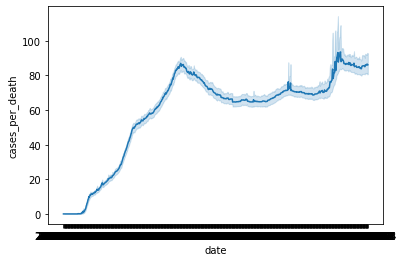

In [11]:
sns.lineplot(x = "date", y = "cases_per_death",
             data = nyt_cases_per_death_df)

In [15]:
combined_weekly = pd.read_sql_query("SELECT * FROM combined_weekly", conn)
combined_weekly.head(10)

,year_week,state,fips,avg_cases,avg_deaths,administered_dose1_pct,booster_pct,metro_status,census_pop_2019
0,2022-15,AL,1001.0,15750.0,213.8,55.46,32.40,Metro,55869
1,2022-15,AL,1003.0,55523.2,678.4,64.18,35.06,Metro,223234
2,2022-15,AL,1005.0,5658.0,98.0,55.52,32.88,Non-metro,24686
3,2022-15,AL,1007.0,6426.2,101.8,42.50,34.54,Metro,22394
4,2022-15,AL,1009.0,14943.0,240.8,38.30,33.12,Metro,57826
5,2022-15,AL,1011.0,2303.6,53.6,67.12,31.28,Non-metro,10101
6,2022-15,AL,1013.0,5053.8,129.0,49.60,32.02,Non-metro,19448
7,2022-15,AL,1015.0,32360.8,621.8,57.20,35.48,Metro,113605
8,2022-15,AL,1017.0,8476.2,161.6,37.72,36.58,Non-metro,33254
9,2022-15,AL,1019.0,5117.2,85.4,37.80,38.06,Non-metro,26196


Onehot encode state, metrostatus.

In [53]:
combined_weekly_encoded = pd.get_dummies(combined_weekly, columns = ['state', 'metro_status'])
combined_weekly_encoded.head(10)

,year_week,fips,avg_cases,avg_deaths,administered_dose1_pct,booster_pct,census_pop_2019,state_AK,state_AL,state_AR,...,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,metro_status_Metro,metro_status_Non-metro
0,2022-15,1001.0,15750.0,213.8,55.46,32.40,55869,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2022-15,1003.0,55523.2,678.4,64.18,35.06,223234,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2022-15,1005.0,5658.0,98.0,55.52,32.88,24686,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-15,1007.0,6426.2,101.8,42.50,34.54,22394,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2022-15,1009.0,14943.0,240.8,38.30,33.12,57826,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,2022-15,1011.0,2303.6,53.6,67.12,31.28,10101,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,2022-15,1013.0,5053.8,129.0,49.60,32.02,19448,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,2022-15,1015.0,32360.8,621.8,57.20,35.48,113605,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,2022-15,1017.0,8476.2,161.6,37.72,36.58,33254,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,2022-15,1019.0,5117.2,85.4,37.80,38.06,26196,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Normalize avg cases, avg deaths, census pop.

In [57]:
scaler = RobustScaler()
combined_weekly_encoded[['avg_cases', 'avg_deaths', 'census_pop_2019']] = scaler.fit_transform(combined_weekly_encoded[['avg_cases', 'avg_deaths', 'census_pop_2019']])
combined_weekly_encoded = pd.DataFrame(combined_weekly_encoded, columns= combined_weekly_encoded.columns)
combined_weekly_encoded.head(10)

,year_week,fips,avg_cases,avg_deaths,administered_dose1_pct,booster_pct,census_pop_2019,state_AK,state_AL,state_AR,...,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,metro_status_Metro,metro_status_Non-metro
0,2022-15,1001.0,2.681951,2.051994,55.46,32.40,0.514656,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2022-15,1003.0,10.271635,7.238915,64.18,35.06,3.466315,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2022-15,1005.0,0.756154,0.759171,55.52,32.88,-0.035290,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-15,1007.0,0.902745,0.801595,42.50,34.54,-0.075712,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2022-15,1009.0,2.527956,2.353429,38.30,33.12,0.549169,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,2022-15,1011.0,0.116054,0.263477,67.12,31.28,-0.292512,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,2022-15,1013.0,0.640858,1.105263,49.60,32.02,-0.127667,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,2022-15,1015.0,5.851692,6.607018,57.20,35.48,1.532891,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,2022-15,1017.0,1.293935,1.469219,37.72,36.58,0.115816,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,2022-15,1019.0,0.652956,0.618501,37.80,38.06,-0.008659,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
combined_weekly_encoded.shape

(348869, 62)

In [59]:
combined_weekly_encoded.to_sql(name="combined_weekly_encoded_scaled", con = conn, if_exists='replace', index = False)